In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_parquet("df_total.parquet")
dados.head()

,arquivo,classe,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,16679_1.jpg,1,170.0,174.0,177.0,172.0,167.0,161.0,156.0,161.0,...,176.0,188.0,168.0,96.0,67.0,77.0,136.0,166.0,175.0,171.0
1,04354.jpg,1,183.0,186.0,191.0,187.0,178.0,179.0,182.0,181.0,...,186.0,183.0,181.0,182.0,183.0,184.0,184.0,185.0,182.0,181.0
2,02725.jpg,1,158.0,158.0,160.0,149.0,149.0,157.0,155.0,150.0,...,185.0,184.0,194.0,190.0,192.0,182.0,181.0,179.0,198.0,190.0
3,11369_1.jpg,1,187.0,187.0,190.0,192.0,196.0,195.0,201.0,216.0,...,193.0,188.0,194.0,196.0,187.0,191.0,190.0,190.0,188.0,190.0
4,19463.jpg,1,176.0,174.0,174.0,162.0,71.0,166.0,206.0,170.0,...,183.0,182.0,176.0,171.0,184.0,176.0,179.0,185.0,174.0,190.0


In [3]:
dados.sample(frac=1).head()

,arquivo,classe,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
34748,12000.jpg,0,127.0,165.0,168.0,171.0,166.0,162.0,163.0,168.0,...,184.0,188.0,179.0,191.0,191.0,188.0,190.0,187.0,185.0,187.0
22076,08626.jpg,0,221.0,220.0,222.0,223.0,222.0,221.0,221.0,221.0,...,220.0,221.0,222.0,219.0,221.0,223.0,220.0,220.0,217.0,217.0
28374,17760.jpg,0,159.0,172.0,174.0,173.0,170.0,175.0,172.0,172.0,...,168.0,175.0,174.0,170.0,166.0,167.0,173.0,173.0,173.0,159.0
28088,02185.jpg,0,192.0,192.0,190.0,187.0,189.0,187.0,189.0,189.0,...,184.0,185.0,185.0,187.0,187.0,188.0,186.0,184.0,185.0,184.0
20183,12720.jpg,0,179.0,182.0,181.0,184.0,176.0,175.0,177.0,170.0,...,183.0,184.0,180.0,183.0,187.0,184.0,183.0,180.0,184.0,188.0


In [4]:
X = dados.drop(['arquivo', 'classe'], axis=1)
y = dados['classe']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=12)

In [5]:
X_train.shape

(28000, 1024)

In [6]:
X_test.shape

(12000, 1024)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [8]:
media_treino = X_train.mean(axis=0)
X_train_center = X_train - media_treino

In [9]:
media_teste = X_test.mean(axis=0)
X_teste_center = media_treino - media_teste

In [10]:
cov_treino = np.cov(X_train, rowvar=False)

In [11]:
autovalores_cov_treino, autovetores_cov_treino = np.linalg.eigh(cov_treino)

In [12]:
autovalores_cov_treino

array([3.09989651e+00, 3.35688301e+00, 3.51271079e+00, ...,
       3.56232333e+04, 5.25382714e+04, 5.41401981e+05])

Os autovalores já vem em ordem crescente, então basta inverter os arrays.

In [13]:
autovalores_cov_treino = autovalores_cov_treino[::-1]
autovetores_cov_treino = autovetores_cov_treino[::-1]

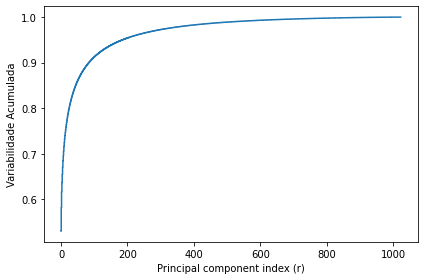

In [14]:
soma_autovalores = sum(autovalores_cov_treino)
var_exp = [(i/soma_autovalores) for i in autovalores_cov_treino]
cum_sum_exp = np.cumsum(var_exp)

plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid')
plt.ylabel('Variabilidade Acumulada')
plt.xlabel('Principal component index (r)')
plt.tight_layout()
plt.show()

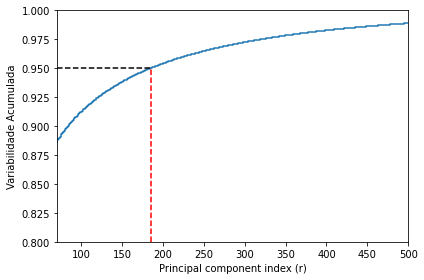

In [15]:
plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid')
plt.ylabel('Variabilidade Acumulada')
plt.xlabel('Principal component index (r)')
plt.axis([70, 500, 0.8, 1.0])

r = 185

plt.vlines(x=r, ymin=0.8, ymax=cum_sum_exp[r], colors='r',linestyles='dashed')
plt.hlines(y=cum_sum_exp[r], xmin=70, xmax=r, colors='k',linestyles='dashed')

plt.tight_layout()
plt.show()

In [16]:
round(cum_sum_exp[r], 2)

0.95

In [17]:
r = 185

In [18]:
autovetores_cov_treino.shape

(1024, 1024)

In [19]:
Q_r = autovetores_cov_treino[:, :r]

In [20]:
Z_train = np.matmul(X_train, Q_r)

In [21]:
Z_test = np.matmul(X_test, Q_r)

In [22]:
Z_train.shape

(28000, 185)

In [23]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Z_train, y_train)
y_pred = model.predict(Z_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [24]:
accuracy_score(y_test, y_pred)

0.71675

In [25]:
X_train.dtype

dtype('float64')

In [26]:
X_train.astype(np.float32)

array([[209., 210., 206., ..., 222., 220., 221.],
       [196., 195., 189., ..., 183., 185., 184.],
       [168., 170., 176., ..., 145., 144., 155.],
       ...,
       [ 63., 106., 171., ..., 145., 177., 178.],
       [191., 191., 194., ..., 191., 192., 191.],
       [200., 195., 196., ..., 182., 154., 157.]], dtype=float32)

In [27]:
X_train.shape

(28000, 1024)

In [28]:
Q_r.shape

(1024, 185)

In [29]:
# comentada para não rodar novamente
# valores foram salvos em um txt

accuracy = []

import time
start = time.time()

X_train = X_train.astype(np.float32)

for r in range(1024):
    Q_r = autovetores_cov_treino[:, :r+1].astype(np.float32)
    Z_train = np.matmul(X_train, Q_r)
    Z_test = np.matmul(X_test, Q_r)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(Z_train, y_train)
    y_pred = model.predict(Z_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(r+1)
    
end = time.time()
print(f'time: {end - start} seconds')

time: 4953.278329133987 seconds

In [30]:
4953.278329133987 / 60 /60

1.375910646981663

In [32]:
with open('accuracy.txt', 'w') as fp:
    for item in accuracy:
    fp.write("%s\n" % item)
print('Terminado')

In [33]:
accuracy_file = []

with open('accuracy.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        accuracy_file.append(x)

acc = [float(i) for i in accuracy_file]
acc

[]

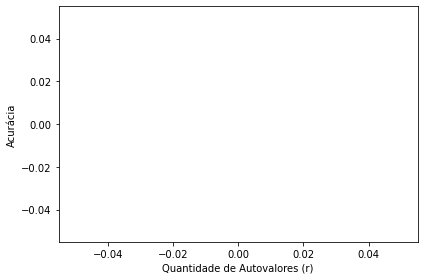

In [34]:
plt.plot(acc)
plt.ylabel('Acurácia')
plt.xlabel('Quantidade de Autovalores (r)')
plt.tight_layout()
plt.show()

In [35]:
u, s, vh = np.linalg.svd(X_train, full_matrices=False)

In [36]:
u.shape, s.shape, vh.shape

((28000, 1024), (1024,), (1024, 1024))

In [37]:
np.allclose(X_train, np.dot(u * s, vh))

True

In [38]:
autoval = s

In [39]:
autovet = vh.T

In [40]:
autovet.shape

(1024, 1024)

In [41]:
np.diag(s).shape

(1024, 1024)

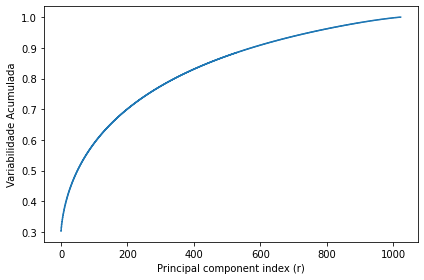

In [42]:
soma_autoval = sum(autoval)
var_exp = [(i/soma_autoval) for i in autoval]
cum_sum_exp = np.cumsum(var_exp)

plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid')
plt.ylabel('Variabilidade Acumulada')
plt.xlabel('Principal component index (r)')
plt.tight_layout()
plt.show()

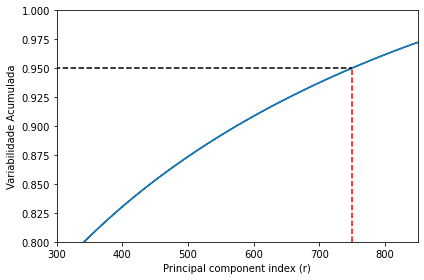

In [52]:
plt.step(range(0, len(cum_sum_exp)), cum_sum_exp, where='mid')
plt.ylabel('Variabilidade Acumulada')
plt.xlabel('Principal component index (r)')

r = 750
plt.axis([300, 850, 0.8, 1.0])
plt.vlines(x=r, ymin=0.8, ymax=cum_sum_exp[r], colors='r',linestyles='dashed')
plt.hlines(y=cum_sum_exp[r], xmin=70, xmax=r, colors='k',linestyles='dashed')

plt.tight_layout()
plt.show()

In [47]:
round(cum_sum_exp[r], 2)

0.95

In [55]:
Q_r_SVD = autovet[:, :r]

In [56]:
Z_train = np.matmul(X_train, Q_r_SVD)
Z_test = np.matmul(X_test, Q_r_SVD)

In [57]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Z_train, y_train)
y_pred = model.predict(Z_test)
print(y_pred)

[0 0 1 ... 1 0 1]


In [59]:
accuracy_score(y_test, y_pred)

0.9185

In [64]:
accuracy_svd = []

import time
start = time.time()

for r in range(1024):
    Q_r_SVD = autovet[:, :r+1].astype(np.float32)
    Z_train = np.matmul(X_train, Q_r_SVD)
    Z_test = np.matmul(X_test, Q_r_SVD)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(Z_train, y_train)
    y_pred = model.predict(Z_test)
    accuracy_svd.append(accuracy_score(y_test, y_pred))
    print(r+1)
    
end = time.time()
print(f'time: {end - start} seconds')

1
2
3
4
5
6
7
8
9
10
time: 5.867219924926758 seconds


In [65]:
accuracy_svd

[0.65225,
 0.8269166666666666,
 0.8901666666666667,
 0.9105,
 0.9240833333333334,
 0.9353333333333333,
 0.9403333333333334,
 0.9440833333333334,
 0.9475,
 0.9524166666666667]